## Demonstrate Visualization Software

Demo of how to run the visDiagnosticPlot module. 

In [10]:
%matplotlib notebook
import visDiagnosticPlots as vd
from importlib import reload
import pathlib
import pandas as pd
import numpy as np


### Structure of vis

<li><b>vis.nIter</b>: total number of iterations</li>
<li><b>vis.fids</b>, <b>vis.goodIdx</b>, <b>vis.dots</b>: calibration information</li>
<li><b>vis.calibModel</b>: calibration model</li>
<li><b>vis.db</b>:  database connection</li>
<li><b>vis.convergeData</b> pandas dataframe with the convergence data</li>


<b>vis.loadConvergence(pfsVisitId)</b>

Load data from a convergence run into a pandas DF.  Loads all iterations, performs join between cobra_match and cobra_target to get meaured and target positions. Dataframe is stored in vis.convergeData

<b>vis.loadSpots()</b>

Load spot data for the same data set as initialized earlier. Dataframe is stored in vis.spotData.

<b>vis.getUnconvergedList(iterVal,convRad=0.01)</b>

Get a list of unconverged cobras at a given iteration, with convergence defined as within 0.01 mm.  The indices are stored in vis.failInd, cobra numbers in vis.failNo. 

<b>vis.visConvergenceHist(range=(0,0.08), bins=20, saveFile = False)</b>

plot a histogram of distance to target for a sequence of iterations (ie, Chi-Hung's nice plots). 

<b>vis.visConvergenceMap(iterVal = None, saveFile = False)</b>

plot a map of distance to the final target for all cobras. If iterVal is specified do for a specific iteration, otherwise for the last iteration. 

<b>vis.visConvergenceBool(iterVal = None, threshNon = 0.01, threshBad = 0.08, saveFile = False)</b>

Plot a converged/non-converged map of the cobras. Three colours; converged, non-converged, and almost-converged, as specified by the thresholds. If  If iterVal is specified do for a specific iteration, otherwise for the last iteration. 

<b>vis.singleCobraMotion(self,cobraNum,hardStop = False, blackDots = False, badCob = True, saveFile = False)</b>

Plot diagnostics for a single cobra, showing 2D motion and distance to target by iteration.  The points are colour coded by iteration in chromatic order from red -> purple

<b>vis.sequencePlot(centrePos = True, hardStop = False, blackDots = False, patrolRegion = True, ff = True, saveFile = False)</b>

Plot all the cobra motions for a convergence sequence, same colour coding for spots as signleCobraMotions 

Optional overplots are: 

  <li><i>centrePos</i>: plot centres of cobra motion (default=True)</li>
  <li><i>blackDots</i>: black dot positions</li>
  <li><i>hardStop</i>: location of theta hardstops</li>
  <li><i>patrolRegion</i>: show bounds of patrol region (default=True)</li>
  <li><i>ff</i>: show location of fiducial fibres (default=True)</li>
  
### Saving Files:


<li><i>saveFile</i>: if the saveFile keyword is set to False, no plot is saved. Set it to the suffix of the desired file type to save the file (ie, png, pdf, jpg, etc). 

## Initialize

To initialize, you need the location of the calibration files.

The initialization will read the cobra geometry, black dot positions, fiducial fibre positions and initialize the database connection. The location of the xml file and dot file are required, you can override the default DB parameters if desired. 

The PurePosixPath is needed for a reference to xmlFile.stem further down the code. 

The camera must also be specified. 

In [3]:
dotFile = '/Users/karr/software/mhs/devel/pfs_instdata/data/pfi/dot/black_dots_mm.csv'
xmlFile=pathlib.PurePosixPath("/Users/karr/software/mhs/devel/pfs_instdata/data/pfi/modules/ALL/ALL_final_20210920_mm.xml")

camera ='rmod_71m'

In [4]:

reload(vd)
vis = vd.VisDiagnosticPlot(xmlFile,dotFile,hostname = 'localhost', username = 'karr', cameraName = camera)


/Users/karr/software/mhs/devel/ics_cobraCharmer/python/ics/cobraCharmer/pfiDesign.py:285: RuntimeWarning: divide by zero encountered in true_divide
  self.S1Nm[i] = angularStep / np.array(list(map(float, slowJoint1Rev)))
/Users/karr/software/mhs/devel/ics_cobraCharmer/python/ics/cobraCharmer/pfiDesign.py:287: RuntimeWarning: divide by zero encountered in true_divide
  self.S2Nm[i] = angularStep / np.array(list(map(float, slowJoint2Rev)))
/Users/karr/software/mhs/devel/ics_cobraCharmer/python/ics/cobraCharmer/pfiDesign.py:289: RuntimeWarning: divide by zero encountered in true_divide
  self.F1Nm[i] = angularStep / np.array(list(map(float, fastJoint1Rev)))
2022-05-09T15:22:41.882 30 root       spectroIds.py:39 no dns.resolver library available, using "S"


## Load a convergence run

This loads the data (targets and moves) for a single convergence run specified by the visitId into a pandas dataframe. 

In [5]:
visitId=71424
vis.loadConvergence(visitId)
vis.loadSpots()

## Plot convergence map

<IPython.core.display.Javascript object>


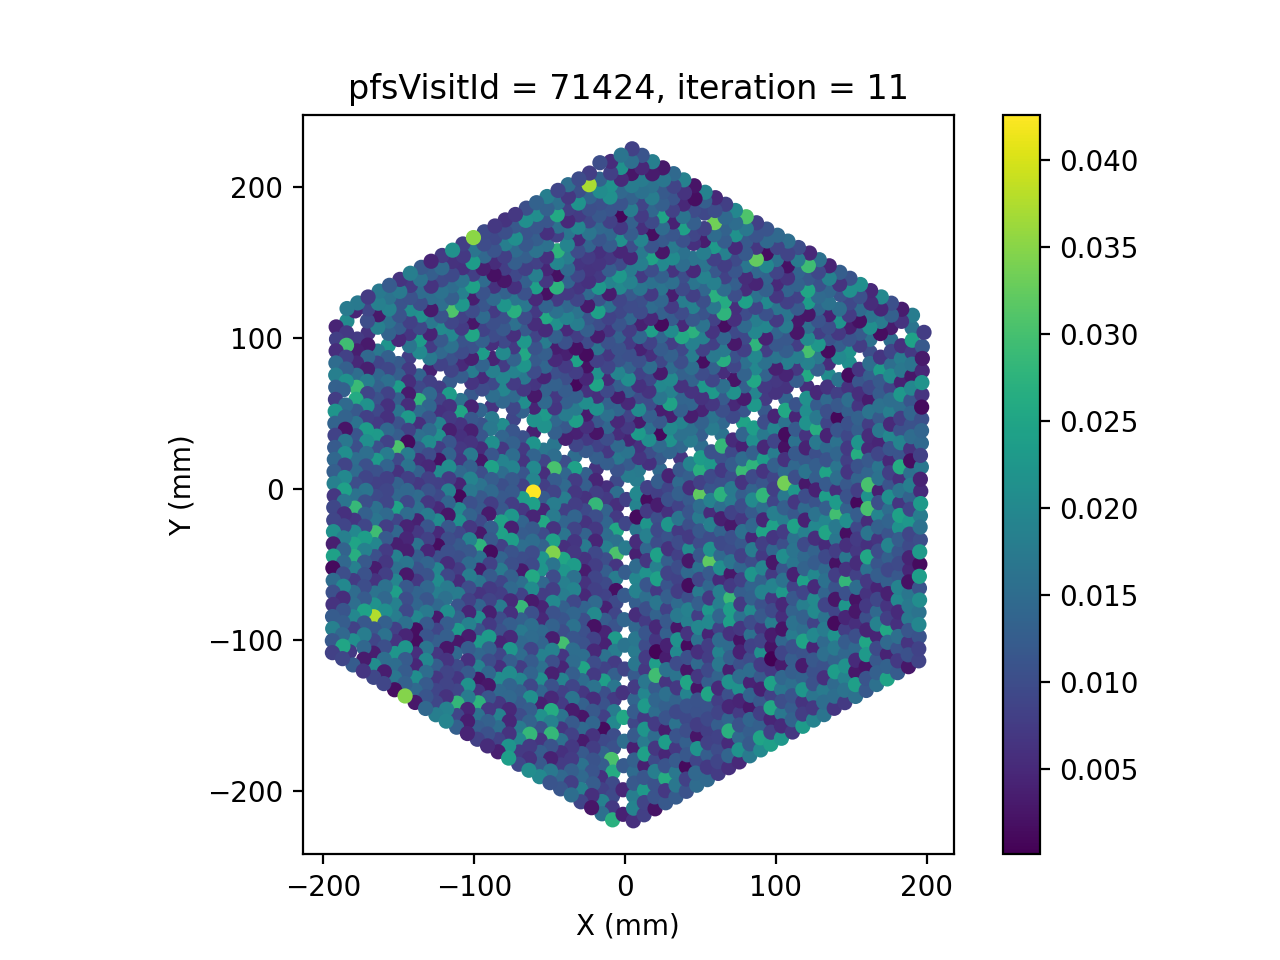

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:title={'center':'pfsVisitId = 71424, iteration = 11'}, xlabel='X (mm)', ylabel='Y (mm)'>)

In [6]:
vis.visConvergenceMap(saveFile='png')

## Plot Boolean Map

<IPython.core.display.Javascript object>


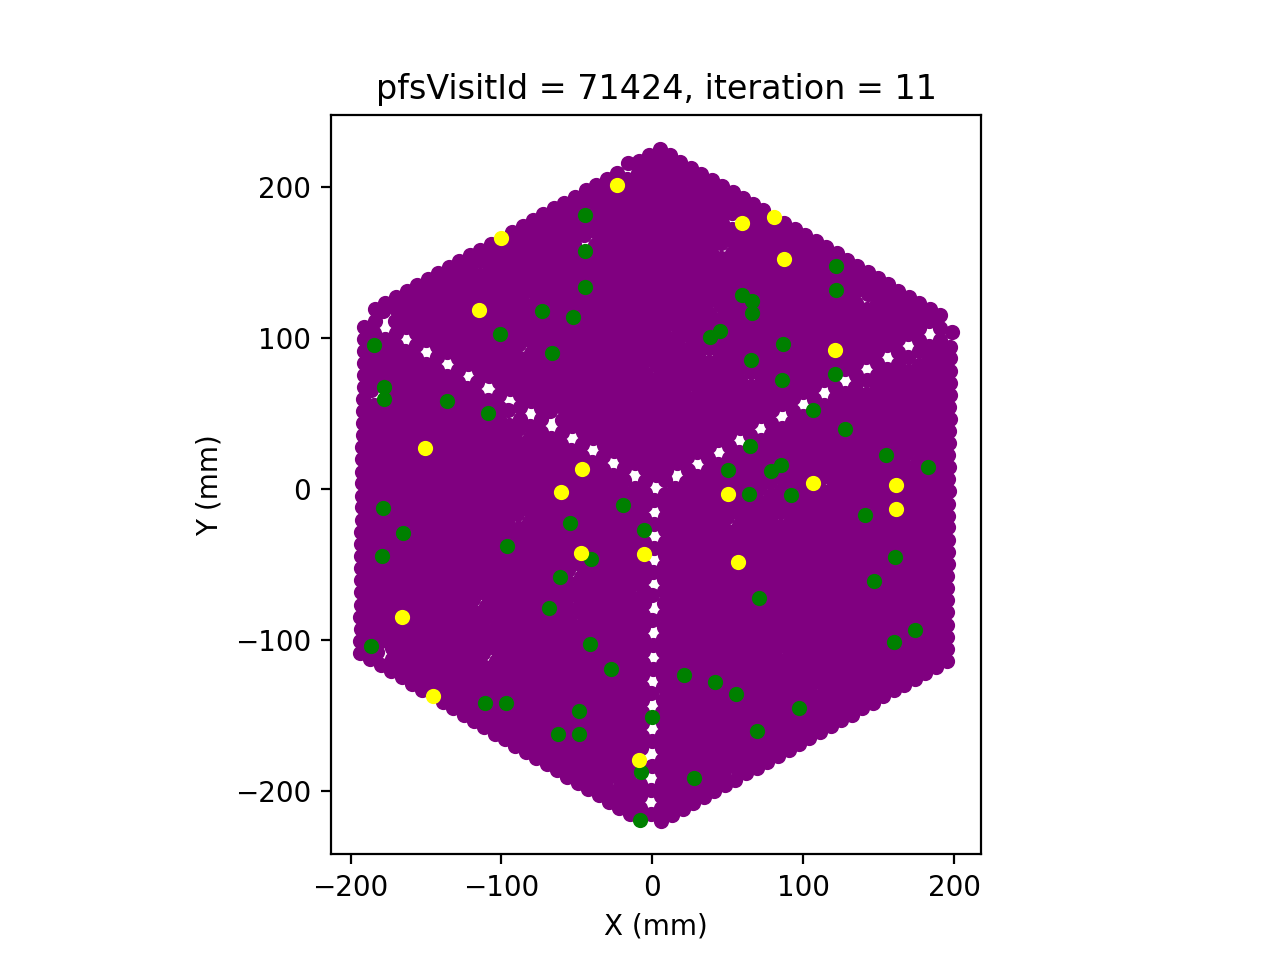

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'pfsVisitId = 71424, iteration = 11'}, xlabel='X (mm)', ylabel='Y (mm)'>)

In [8]:
vis.visConvergenceBool(threshNon = 0.025, threshBad = 0.03,saveFile='png')

## Sequence Plot

Plots the whole field, showing the motion of the cobras for the convergece sequence. Optionally overplot the black dot locations, centre positions, patrol region, fiducial fibres and hard stops. 

<IPython.core.display.Javascript object>


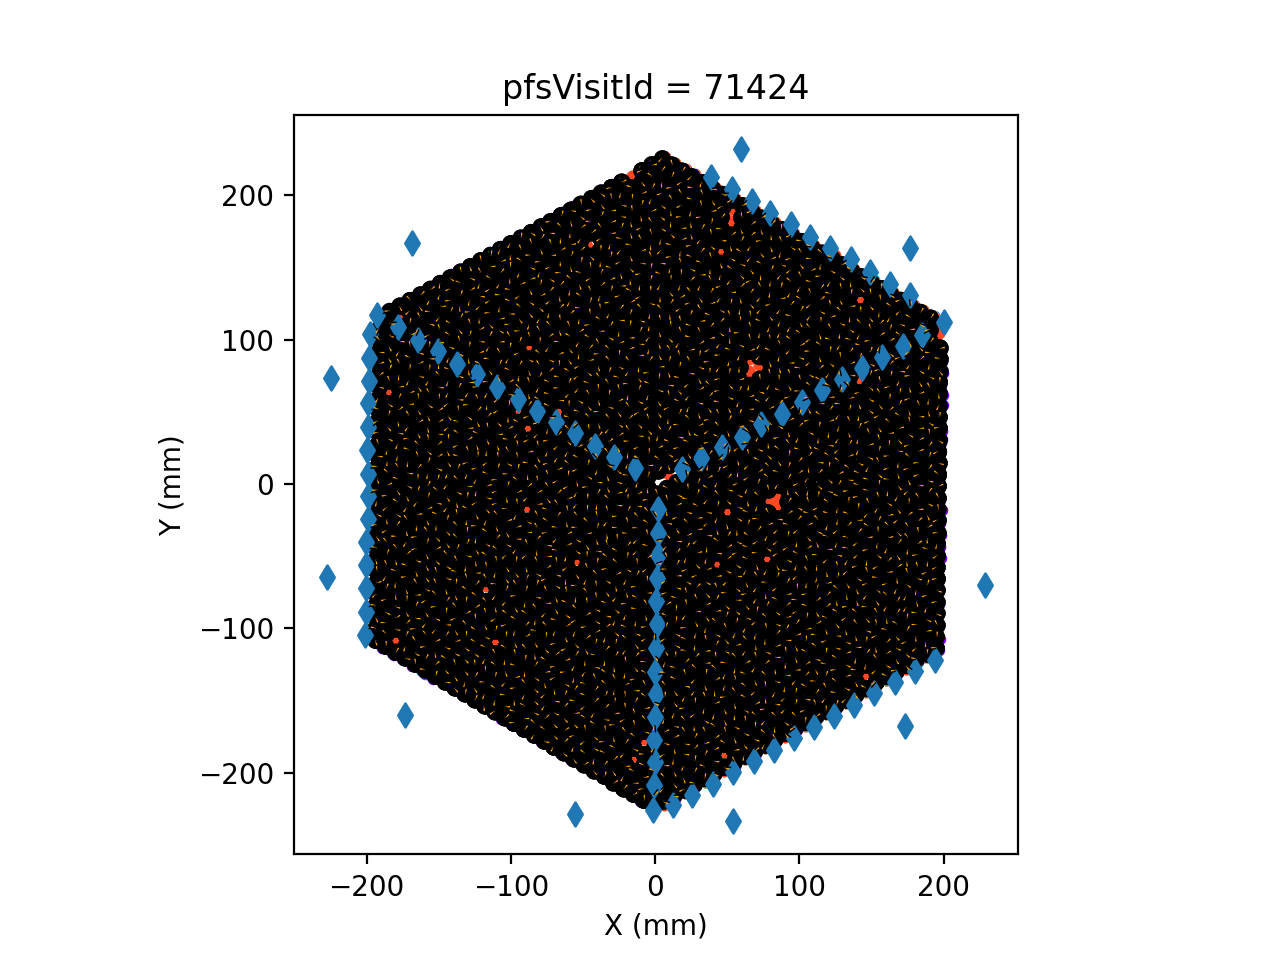

In [9]:
fig,ax = vis.sequencePlot(hardStop = True, blackDots = True, ff = True, saveFile = 'png')


## Histograms 

plot histograms of the distance to the target for each iteration

<IPython.core.display.Javascript object>


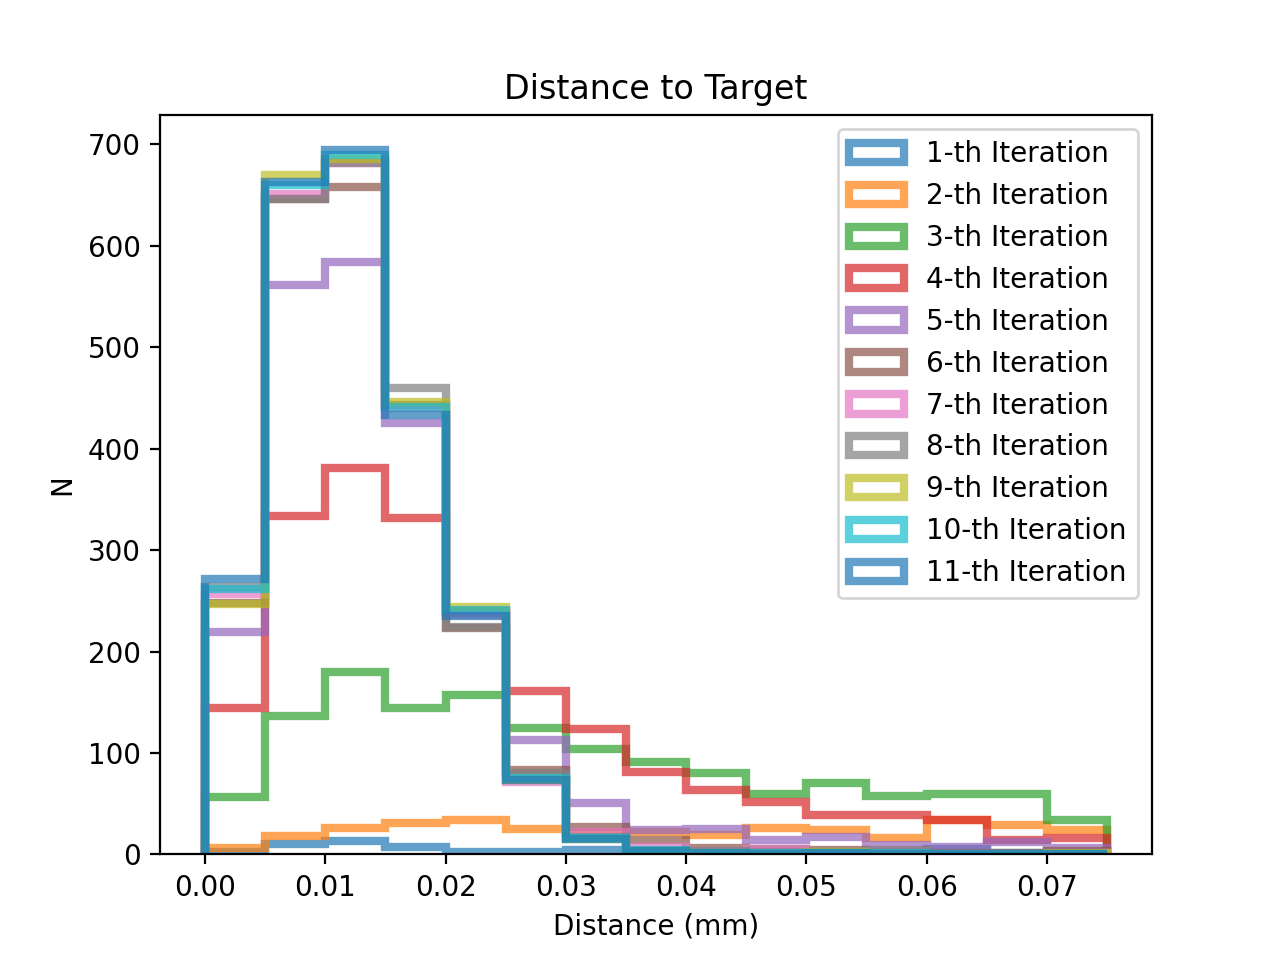

In [11]:
bins = np.arange(0,0.08,0.005)

fig,ax=vis.visConvergenceHist(saveFile='png',bins=bins)


## Plot a single cobra motion


<IPython.core.display.Javascript object>


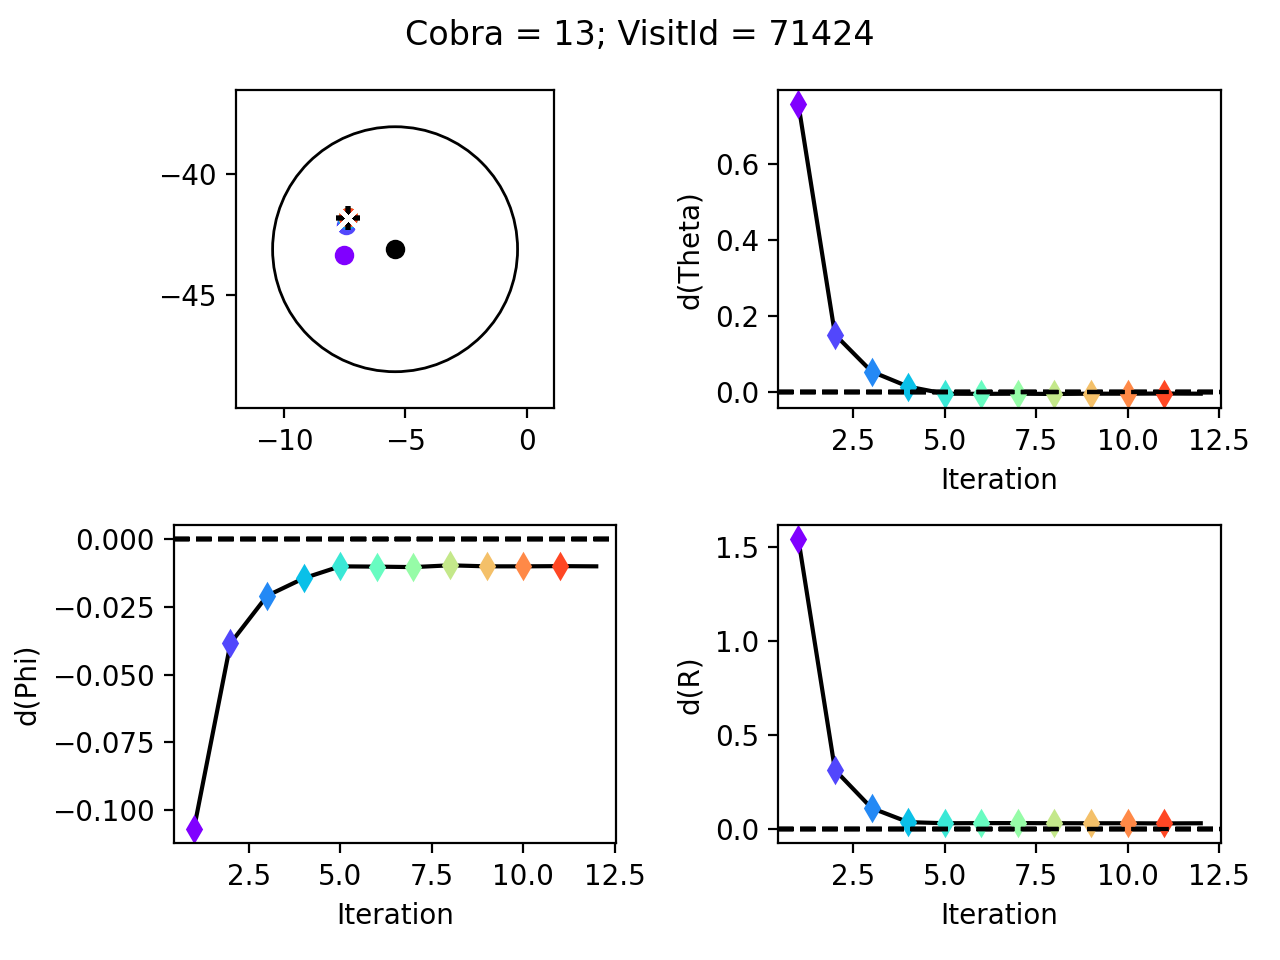

Cobra = 13; VisitId = 71424


In [12]:
#get the list of very non-converged cobras
vis.getUnconvergedList(11,convRad=0.03)

#use this as input for cobra diagnostics
for cobraNum in vis.failNo[0:1]:
    vis.singleCobraMotion(cobraNum,saveFile = 'png')

<IPython.core.display.Javascript object>


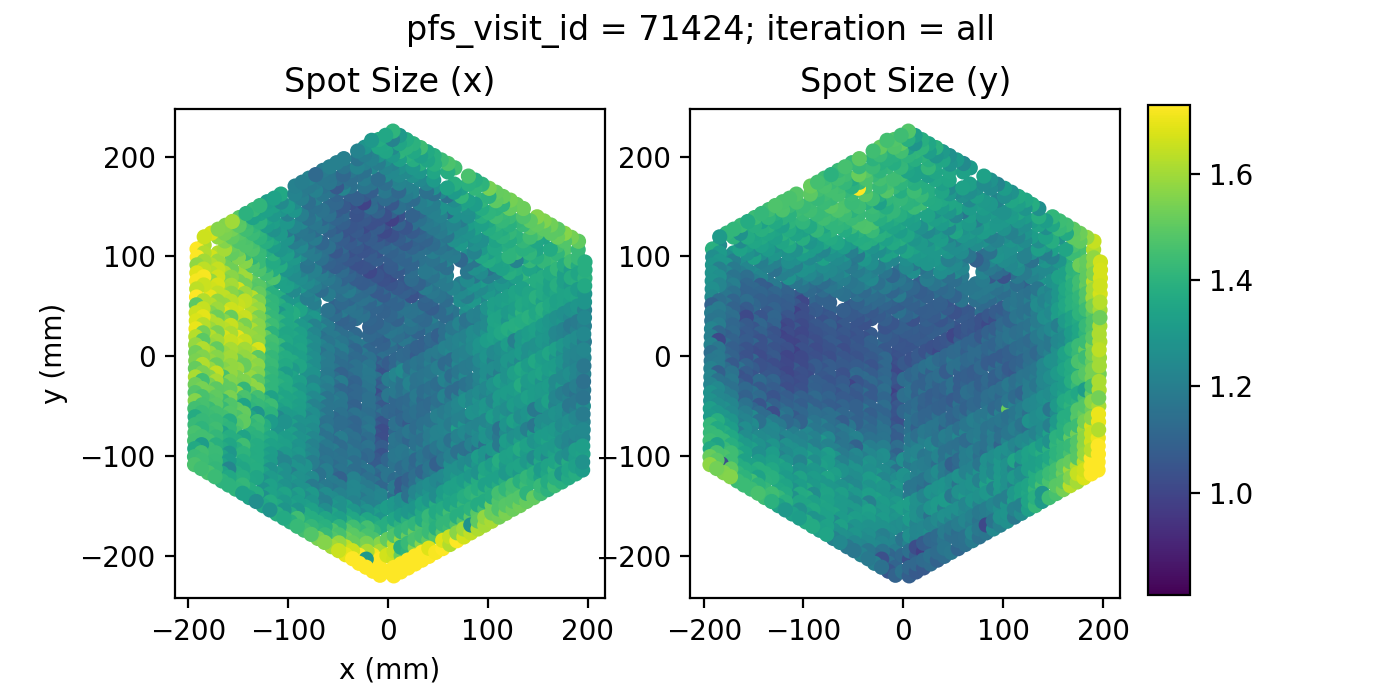

(<Figure size 700x350 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Spot Size (x)'}, xlabel='x (mm)', ylabel='y (mm)'>,
        <AxesSubplot:title={'center':'Spot Size (y)'}>], dtype=object))

In [12]:

vis.visSize(saveFile='png',iterVal=-1)


<IPython.core.display.Javascript object>


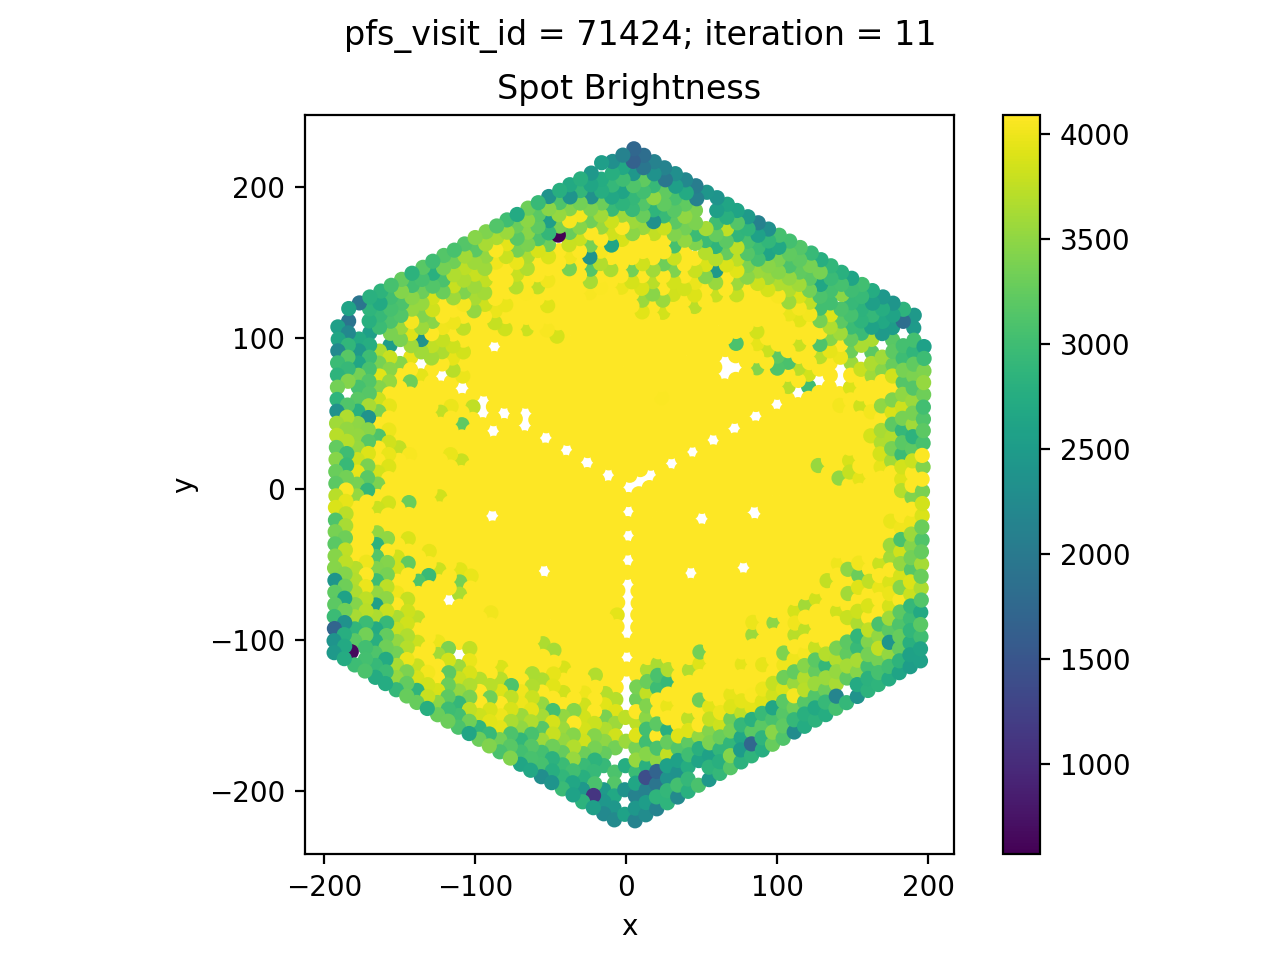

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:title={'center':'Spot Brightness'}, xlabel='x', ylabel='y'>)

In [13]:
vis.visBright(saveFile='png')

<IPython.core.display.Javascript object>


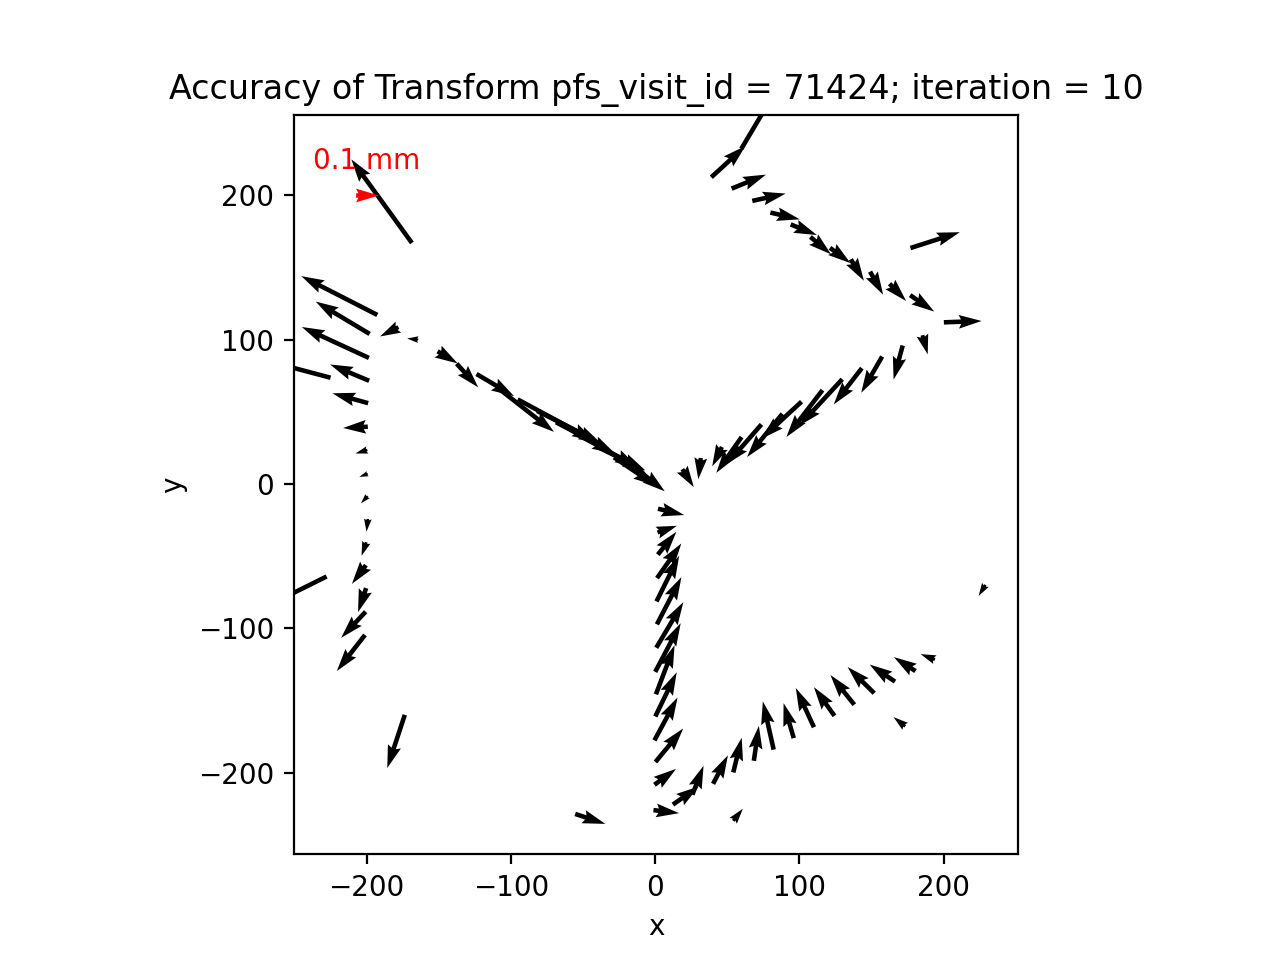

In [14]:
vis.fidDiff(10,saveFile='png')

In [48]:
vis.failNo

array([  13,   47,  176,  190,  239,  586,  627,  673,  958, 1197, 1317,
       1480, 1509, 1518, 1573, 1667, 1798, 1840, 1928, 1985])